In [17]:
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.constants import epsilon_0
from scipy.stats import chi2

$\textbf{4.1 Record and Inspect data (Hot Water)}$

In [18]:
folder_path = r"C:\Users\zhouh\OneDrive\Documents\UofT\UofT Third Year\AST326-Lab-Report-3\Hot_Water"
good_files = []
for entry_name in os.listdir(folder_path):
    full_path = os.path.join(folder_path, entry_name)
    good_files.append(full_path)

data = np.fromfile('Hot_Water/nov_20_10M_83.3_4.dat', dtype='int16') - 2 ** 11

mean = np.mean(data)
median = np.median(data)
std = np.std(data)

sec_data = data[100000:]



Text(0, 0.5, 'Normalized Counts')

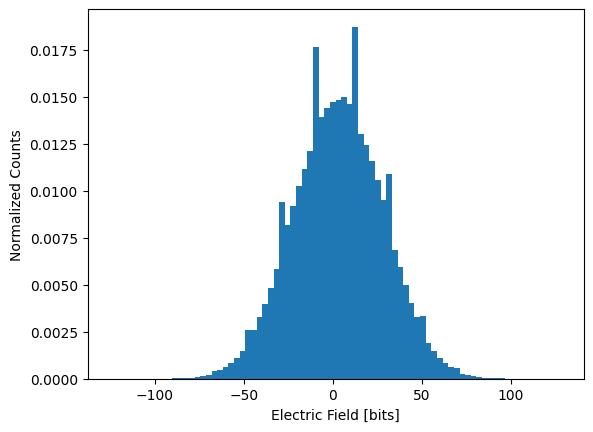

In [19]:
plt.hist(sec_data, bins=80, density=True)
plt.xlabel('Electric Field [bits]')
plt.ylabel('Normalized Counts')

$\textbf{4.2 Examine Normal and $\chi^2$ Distributions}$

In [20]:
power = np.array(sec_data)**2

Text(0.5, 1.0, 'Power Distribution [log scale]')

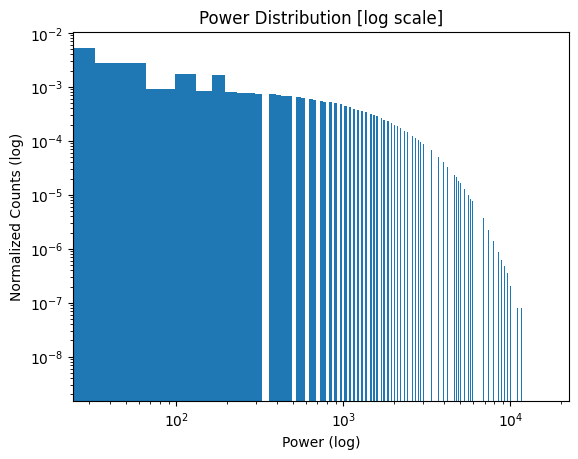

In [21]:
bin_counts, bin_centers, patches = plt.hist(power, bins=500, density=True)
# plt.plot()
plt.yscale('log')
plt.xscale('log')
plt.ylabel('Normalized Counts (log)')
plt.xlabel('Power (log)')
plt.title('Power Distribution [log scale]')

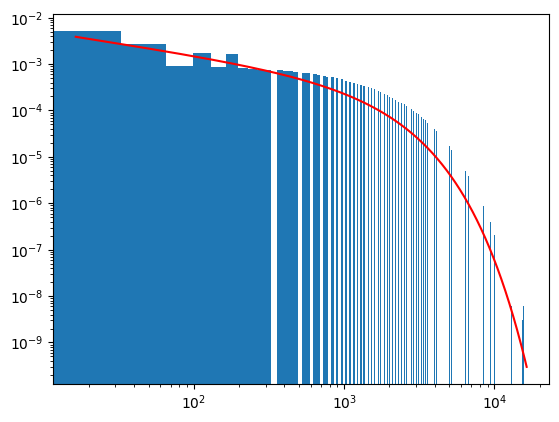

In [22]:
x = np.linspace(0, np.max(power), 1000)
scale = np.mean(power)
plt.plot(x, chi2.pdf(x, df =1, scale = scale), 'r', label='$chi^2$ PDF')
plt.hist(power, bins=500, density=True)
plt.yscale('log')
plt.xscale('log')

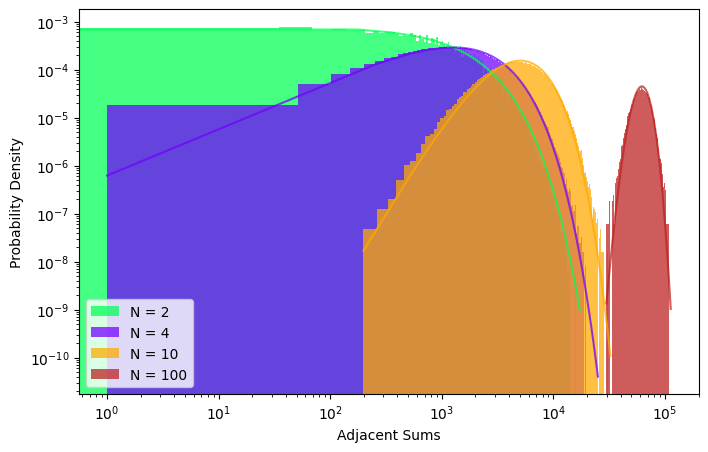

In [23]:
def sum_adjacent(power, N):
    """Return array of sums of N adjacent samples."""
    P_trim = power[:(len(power)//N)*N]
    return P_trim.reshape(-1, N).sum(axis=1)


colour=['#00FF55BB', '#7200FFBB', '#FFAA00BB', '#BC2121BB']
N = [2,4,10,100]
plt.figure(figsize=(8,5))
for c,i in enumerate(N):
    S = sum_adjacent(power, i)

    plt.hist(S, bins=500, density=True, color = colour[c], label=f'N = {i}')
    plt.xscale('log')
    plt.yscale('log')

    x = np.linspace(np.min(S), np.max(S), 100)
    s = np.mean(S)/i
    plt.plot(x, chi2.pdf(x, df =i, scale = s), color = colour[c])

    plt.xlabel('Adjacent Sums')
    plt.ylabel('Probability Density')

    plt.legend(loc='lower left')

In [24]:
# Temperature estimates as a timestream

$\textbf{4.3 Generate a Spectrum}$

In [25]:
n = 1024*4
sample_rate = 1*10**9
shifted_power = np.fft.fftshift(sec_data)
trim_power = shifted_power[:(len(shifted_power)//n)*n]
reshaped_data = trim_power.reshape(-1,n)
# fourier transform

fourier_trans = np.fft.fft(reshaped_data)
print(fourier_trans.shape)
fourier_trans = fourier_trans[:,:n//2]

power_spectra = np.abs(fourier_trans)**2

spectrum_dB = 10*np.log10(power_spectra)

(2416, 4096)


In [26]:
sample_rate = 1*10**6
frequencies = np.fft.fftfreq(n, sample_rate)
print(frequencies)

[ 0.00000000e+00  2.44140625e-10  4.88281250e-10 ... -7.32421875e-10
 -4.88281250e-10 -2.44140625e-10]


In [27]:
avg_spectrum = []
for i in range(len(spectrum_dB[0])):
    index_spectrum = []
    for j in range(len(spectrum_dB)):
        index_spectrum.append(spectrum_dB[j][i])
    avg_spectrum.append(np.mean(index_spectrum))

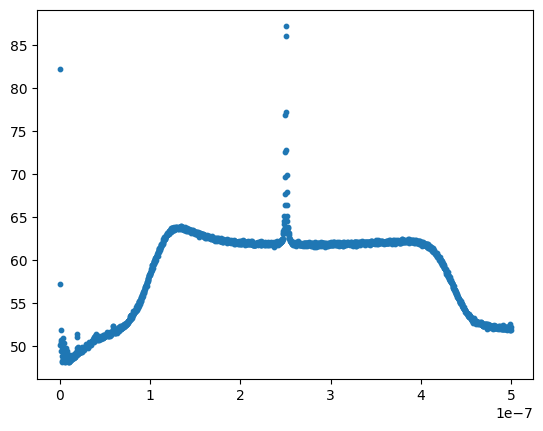

In [28]:
plt.scatter(frequencies[:2048], avg_spectrum, s=10)


In [29]:
# section = data[250000:260000]
# f = np.fft.fft(section)
# print(f.shape)
# f1 = np.fft.rfft(section)
# print(f1.shape)
#
# p = np.abs(f)**2
#
# s = 10*np.log10(p)

In [30]:
#plt.plot(section,'.')
# plt.plot(s, '.')